In [1]:
import os
import tensorflow as tf

from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext
from tfx.orchestration import metadata

In [2]:
PIPELINE_NAME = 'chahya_santoso-pipeline'
    
# pipeline inputs
DATA_ROOT = 'data'
TRANSFORM_MODULE_FILE = 'modules/digit_classification_transform.py'
TUNER_MODULE_FILE = 'modules/digit_classification_tuner.py'
TRAINER_MODULE_FILE = 'modules/digit_classification_trainer.py'
    
# pipeline outputs
OUTPUT_BASE = 'output'
serving_model_dir = os.path.join(OUTPUT_BASE, 'serving_model')
pipeline_root = os.path.join(OUTPUT_BASE, PIPELINE_NAME)
metadata_path = os.path.join(pipeline_root, 'metadata.sqlite')

interactive_context = InteractiveContext(
    pipeline_root=pipeline_root,
    metadata_connection_config=metadata.sqlite_metadata_connection_config(
            metadata_path
        ),
)

In [3]:
from modules.components import init_components

components = init_components(
    DATA_ROOT,
    module_files={
        'transform': TRANSFORM_MODULE_FILE,
        'tuner': TUNER_MODULE_FILE,
        'trainer': TRAINER_MODULE_FILE,
    },
    training_steps=80,
    eval_steps=15,
    serving_model_dir=serving_model_dir,
)

### ExampleGen

In [4]:
"""input_config = example_gen_pb2.Input(splits=[
    example_gen_pb2.Input.Split(name='train', pattern='train\\*'),
    example_gen_pb2.Input.Split(name='eval', pattern='test\\*')
])

# Brings data into the pipeline.
example_gen = ImportExampleGen(
    input_base=data_root, input_config=input_config)"""

example_gen = components[0]
interactive_context.run(example_gen)

ExecutionResult(
    component_id: ImportExampleGen
    execution_id: 1
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=ImportExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}))

In [5]:
from modules.utils import print_example_from_uri

# Get the URI of the output artifact representing the training examples, which is a directory
train_uri = os.path.join(example_gen.outputs['examples'].get()[0].uri, 'Split-train')

# lihat isi 5 teratas dari train set
print_example_from_uri(train_uri, 5)

features {
  feature {
    key: "image"
    value {
      bytes_list {
        value: "\211PNG\r\n\032\n\000\000\000\rIHDR\000\000\000 \000\000\000 \010\002\000\000\000\374\030\355\243\000\000\003\331IDATx\234\355\224\317K*{\030\306\307\031\035e\314~8j\204\230\242\210f\030A\264\311E\020\265I\022B\013\202\212\244\215m\"\202\376\202\376\202\240E\213\202Vm\244\262\260U\231\224Vd\004\023\221AZ\251e\244\316\230\206\371kF\347.\346\336n\367\234\n\353\234\325\345|\226\357|\347y\336y\346\373\276\000\360\207?\374*\254\357\275\006A\220H$BQ\224\303\341\274\026\243\321h*\225\242(\352\373\355@\020\304\343\361\252\252\252d2\331\354\354l$\022)\275affF&\223\261X\377i\232]\271:\217\307kjj2\233\315\355\355\355B\241P*\225\212\305b\232\246_\017LOO\247\323\351\265\2655\034\307\277f\000\303\260N\247\033\036\0366\030\014r\271\\ \020@\020\004\000@\251T\212\307\343\027\027\027\006\203\001A\020\024Ekjj\336\206V\221\201F\2431\231LF\243Q\245R\241(\n\3030\213\305:;;\333\337\337\347\363\371uuu.\227+\233\315\366\366\

### StatisticsGen

In [6]:
statistics_gen = components[1] #StatisticsGen(examples=example_gen.outputs['examples'])
interactive_context.run(statistics_gen)
interactive_context.show(statistics_gen.outputs['statistics'])

### SchemaGen

In [7]:
"""schema_gen = SchemaGen(
      statistics=statistics_gen.outputs['statistics'], infer_feature_shape=True)"""
schema_gen = components[2]
interactive_context.run(schema_gen)
interactive_context.show(schema_gen.outputs['schema'])

,Type,Presence,Valency,Domain
Feature name,,,,
'image',BYTES,required,,-
'label',INT,required,,-


### ExampleValidator

In [8]:
"""example_validator = ExampleValidator(
      statistics=statistics_gen.outputs['statistics'],
      schema=schema_gen.outputs['schema'])"""
example_validator = components[3]
interactive_context.run(example_validator)
interactive_context.show(example_validator.outputs['anomalies'])

### Transform

In [9]:
"""transform = Transform(
      examples=example_gen.outputs['examples'],
      schema=schema_gen.outputs['schema'],
      module_file=module_file['transform']) """
transform = components[4]
interactive_context.run(transform)

Instructions for updating:
Use ref() instead.


Instructions for updating:
Use ref() instead.


INFO:tensorflow:Assets written to: output\chahya_santoso-pipeline\Transform\transform_graph\5\.temp_path\tftransform_tmp\b8df1bfff2684ae08aedafe7bfe24473\assets


INFO:tensorflow:Assets written to: output\chahya_santoso-pipeline\Transform\transform_graph\5\.temp_path\tftransform_tmp\b8df1bfff2684ae08aedafe7bfe24473\assets


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


ExecutionResult(
    component_id: Transform
    execution_id: 5
    outputs:
        transform_graph: OutputChannel(artifact_type=TransformGraph, producer_component_id=Transform, output_key=transform_graph, additional_properties={}, additional_custom_properties={})
        transformed_examples: OutputChannel(artifact_type=Examples, producer_component_id=Transform, output_key=transformed_examples, additional_properties={}, additional_custom_properties={})
        updated_analyzer_cache: OutputChannel(artifact_type=TransformCache, producer_component_id=Transform, output_key=updated_analyzer_cache, additional_properties={}, additional_custom_properties={})
        pre_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=pre_transform_schema, additional_properties={}, additional_custom_properties={})
        pre_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=pre_transform_stats, additional_properties={}, additional_custom_properties={})
        post_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=post_transform_schema, additional_properties={}, additional_custom_properties={})
        post_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=post_transform_stats, additional_properties={}, additional_custom_properties={})
        post_transform_anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=Transform, output_key=post_transform_anomalies, additional_properties={}, additional_custom_properties={}))

In [10]:
transform_uri = os.path.join(transform.outputs['transformed_examples'].get()[0].uri, 'Split-train')

# lihat 5 data teratas dari example yang sudah ditransform
print_example_from_uri(transform_uri, 5)

features {
  feature {
    key: "image_xf"
    value {
      float_list {
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
        value: -1.0
      

### Tuner

In [11]:
tf.keras.backend.clear_session()

"""tuner = Tuner(
        module_file=os.path.abspath(module_file['tuner']),
        examples=transform.outputs['transformed_examples'],
        transform_graph=transform.outputs['transform_graph'],
        schema=schema_gen.outputs['schema'],
        train_args=trainer_pb2.TrainArgs(
            splits=['train'],
            num_steps=80),
        eval_args=trainer_pb2.EvalArgs(
            splits=['eval'],
            num_steps=15)
    )"""
tuner = components[5]
interactive_context.run(tuner)

Trial 10 Complete [00h 00m 27s]
val_sparse_categorical_accuracy: 0.5322916507720947

Best val_sparse_categorical_accuracy So Far: 0.5760416388511658
Total elapsed time: 00h 03m 42s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


Results summary
Results in output\chahya_santoso-pipeline\.temp\6\my_tuning
Showing 10 best trials
Objective(name="val_sparse_categorical_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
hidden_size: 256
dropout_rate: 0.2
Score: 0.5760416388511658

Trial 05 summary
Hyperparameters:
hidden_size: 256
dropout_rate: 0.30000000000000004
Score: 0.5479166507720947

Trial 03 summary
Hyperparameters:
hidden_size: 128
dropout_rate: 0.30000000000000004
Score: 0.5364583134651184

Trial 09 summary
Hyperparameters:
hidden_size: 192
dropout_rate: 0.2
Score: 0.5322916507720947

Trial 07 summary
Hyperparameters:
hidden_size: 256
dropout_rate: 0.4
Score: 0.5249999761581421

Trial 04 summary
Hyperparameters:
hidden_size: 192
dropout_rate: 0.30000000000000004
Score: 0.5218750238418579

Trial 06 summary
Hyperparameters:
hidden_size: 192
dropout_rate: 0.4
Score: 0.47708332538604736

Trial 02 summary
Hyperparameters:
hidden_size: 128
dropout_rate: 0.4
Score: 0.4270833432674408

Trial 00 summary

ExecutionResult(
    component_id: Tuner
    execution_id: 6
    outputs:
        best_hyperparameters: OutputChannel(artifact_type=HyperParameters, producer_component_id=Tuner, output_key=best_hyperparameters, additional_properties={}, additional_custom_properties={})
        tuner_results: OutputChannel(artifact_type=TunerResults, producer_component_id=Tuner, output_key=tuner_results, additional_properties={}, additional_custom_properties={}))

### Trainer

In [12]:
tf.keras.backend.clear_session()
"""from tfx.components import Trainer
from tfx.proto import trainer_pb2

module_file = {
    'trainer': 'modules/digit_classification_trainer.py'
}
trainer = Trainer(
    module_file=module_file['trainer'],
    examples=transform.outputs['transformed_examples'],
    transform_graph=transform.outputs['transform_graph'],
    schema=schema_gen.outputs['schema'],
    #hyperparameters=tuner.outputs['best_hyperparameters'],
    train_args=trainer_pb2.TrainArgs(num_steps=80),
    eval_args=trainer_pb2.EvalArgs(num_steps=15),
)"""
trainer = components[6]
interactive_context.run(trainer)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_xf (InputLayer)       [(None, 75, 75, 3)]       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570  

INFO:tensorflow:struct2tensor is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:tensorflow_decision_forests is not available.


INFO:tensorflow:Assets written to: output\chahya_santoso-pipeline\Trainer\model\7\Format-Serving\assets


INFO:tensorflow:Assets written to: output\chahya_santoso-pipeline\Trainer\model\7\Format-Serving\assets


ExecutionResult(
    component_id: Trainer
    execution_id: 7
    outputs:
        model: OutputChannel(artifact_type=Model, producer_component_id=Trainer, output_key=model, additional_properties={}, additional_custom_properties={})
        model_run: OutputChannel(artifact_type=ModelRun, producer_component_id=Trainer, output_key=model_run, additional_properties={}, additional_custom_properties={}))

### Resolver

In [13]:
resolver = components[7]
interactive_context.run(resolver)

ExecutionResult(
    component_id: Latest_blessed_model_resolver
    execution_id: 8
    outputs:
        model: OutputChannel(artifact_type=Model, producer_component_id=Latest_blessed_model_resolver, output_key=model, additional_properties={}, additional_custom_properties={})
        model_blessing: OutputChannel(artifact_type=ModelBlessing, producer_component_id=Latest_blessed_model_resolver, output_key=model_blessing, additional_properties={}, additional_custom_properties={}))

### Evaluator

In [14]:
evaluator = components[8]
interactive_context.run(evaluator)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


ExecutionResult(
    component_id: Evaluator
    execution_id: 9
    outputs:
        evaluation: OutputChannel(artifact_type=ModelEvaluation, producer_component_id=Evaluator, output_key=evaluation, additional_properties={}, additional_custom_properties={})
        blessing: OutputChannel(artifact_type=ModelBlessing, producer_component_id=Evaluator, output_key=blessing, additional_properties={}, additional_custom_properties={}))

In [15]:
import tensorflow_model_analysis as tfma 

# Visualize the evaluation results
eval_result = evaluator.outputs['evaluation'].get()[0].uri
tfma_result = tfma.load_eval_result(eval_result)
tfma.view.render_slicing_metrics(tfma_result)
tfma.addons.fairness.view.widget_view.render_fairness_indicator(
    tfma_result
)

FairnessIndicatorViewer(slicingMetrics=[{'sliceValue': 'Overall', 'slice': 'Overall', 'metrics': {'sparse_cate…

### Pusher

In [16]:
pusher = components[9]
interactive_context.run(pusher)

ExecutionResult(
    component_id: Pusher
    execution_id: 10
    outputs:
        pushed_model: OutputChannel(artifact_type=PushedModel, producer_component_id=Pusher, output_key=pushed_model, additional_properties={}, additional_custom_properties={}))

In [17]:
# Test model - load the pushed model
from modules.utils import get_example_from_uri, decode_example

#push_uri = 'output/chahya_santoso-pipeline/Trainer/model/7/Format-Serving' 
push_uri = pusher.outputs['pushed_model'].get()[0].uri 
latest_version_path = os.path.join(push_uri)
loaded_model = tf.saved_model.load(latest_version_path)
model = loaded_model.signatures["serving_default"]

In [19]:
# Load test data from exampleGen split eval

#test_uri = os.path.join('output/chahya_santoso-pipeline/ImportExampleGen/examples/1', 'Split-eval')
test_uri = os.path.join(example_gen.outputs['examples'].get()[0].uri, 'Split-eval')
serialized_examples = get_example_from_uri(test_uri)
#print(serialized_examples[:5])
features = {
    'image': tf.io.VarLenFeature(tf.string),
    'label': tf.io.VarLenFeature(tf.int64),
}

images, labels = decode_example(serialized_examples, features)

print(images[:5])
print(labels[:5])

[b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00 \x00\x00\x00 \x08\x02\x00\x00\x00\xfc\x18\xed\xa3\x00\x00\x03\xaeIDATx\x9c\xed\x95KH*}\x18\xc6gF\xe7fi:\xe6$aD\x9a\x86\xa0%\x86HD\x0b\xdb\x18\xb6\x08\x82\x16-\nZ\x9e]\xb8q\xd1&\xa8 \xdaG\x9b\x16\xad"J\x17\t] \xaa\x85\xd4\xa2EiW\xb5q\x8c\xb0\xc1\x0bxa2t\xd4\xf1[\xc8\x17\x11\xe5\xa98\x9b\xef\xe3<\xbba\x9e\xf7\xfd\xcd\xff\xe1}\xe7\x0f\x00\x7f\xf5\x1f\x12\x82 \xad\xad\xadb\xb1\x18\x82\xa0\xafW\x81u\xde\t\x85\xc2\x96\x96\x16\x92$\x05\x02\x01\x04A*\x95\xaa\xab\xab\x8ba\x98\x9b\x9b\x1b\x9a\xa6\xb3\xd9,\xcf\xf3?\x07 \x08\xd2\xd9\xd9\xe9p8\xfa\xfb\xfbE"\x11\xcf\xf3:\x9d\x8e$\xc9J\xa5r||\xec\xf1x|>\x1f\xc30\xa5R\xe9\xeb\xa7\xf9\x97\t\x828\x8e\x1b\x8d\xc6\xf5\xf5\xf5D"\xf1\xf2\xf2\x92\xcb\xe5\x82\xc1\xe0\xe6\xe6\xe6\xfe\xfe~*\x95\xca\xe7\xf3\x99LfqqQ\xadV\x83`\xbd\x0c>\x96\\.\x9f\x9e\x9ef\x18&\x9dN\x9f\x9f\x9f\xcf\xce\xceZ,\x16\x99L\xd6\xd8\xd8(\x91H\xe4r\xb9\xd3\xe9\x0c\x85B\xb1Xlnn\x8e$\xc9\xefu\xc7q\xdcf\xb3\xdd\xde\xde\xde\xdf\xdf\xcf\xcc\xcc

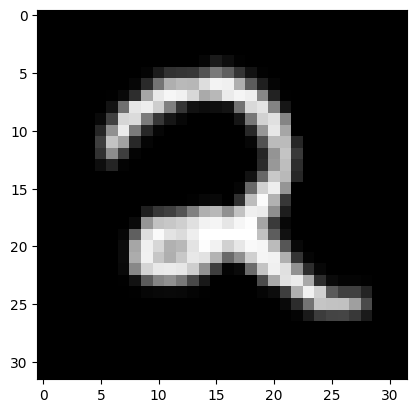

Real classname: 2
Prediction classname: 2 , Score: 0.49591497


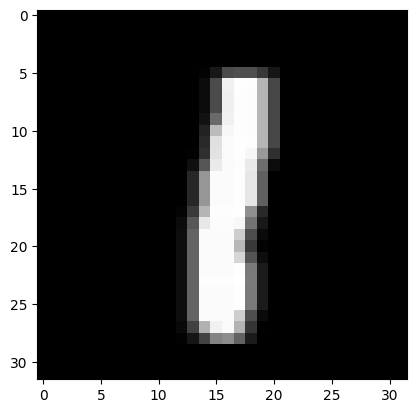

Real classname: 1
Prediction classname: 1 , Score: 0.99735767


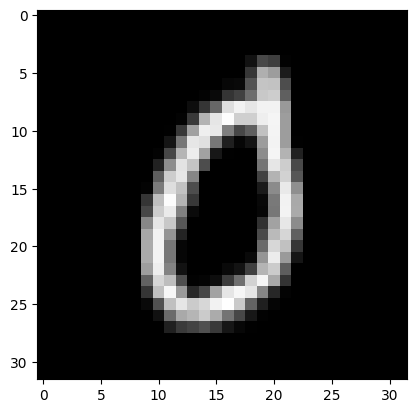

Real classname: 0
Prediction classname: 0 , Score: 0.9659831


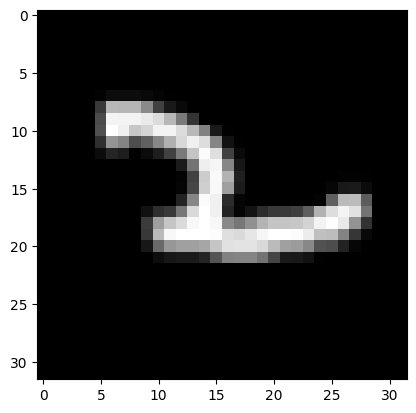

Real classname: 2
Prediction classname: 5 , Score: 0.9075695


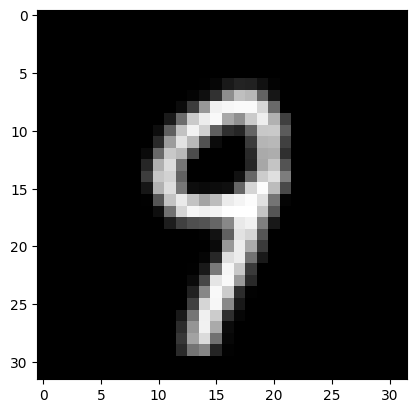

Real classname: 9
Prediction classname: 9 , Score: 0.98077387


In [20]:
import matplotlib.pyplot as plt

# Make prediction
output = model(tf.constant(serialized_examples))

y_true = labels
y_pred = output['output'].numpy()
y_pred_label = output['label'].numpy() 

#print(outputs)
for index, im in enumerate(images[:5]):
    im_tensor = tf.io.decode_png(im, channels=3)
    plt.imshow(im_tensor)
    plt.show()
    print('Real classname:', y_true[index])
    
    pred_label = y_pred_label[index] #karena pred_label = index argmax
    print('Prediction classname:', pred_label, ', Score:', y_pred[index][pred_label])

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred_label))
print('\nClassification Report')
print(classification_report(y_true, y_pred_label))

Confusion Matrix
[[92  0  0  1  0  0  6  0  0  1]
 [ 0 97  0  0  0  0  1  2  0  0]
 [ 2  0 71  9  0  4  4  5  3  2]
 [ 0  0  5 78  0  7  0  1  7  2]
 [ 0  1  2  3 86  0  2  0  2  4]
 [ 6  0 10 14  0 61  6  0  1  2]
 [ 4  0  2  4  0  3 82  0  1  4]
 [ 0  1  4  0  7  1  0 84  1  2]
 [ 0  0  4  2  0  1  0  0 92  1]
 [ 3  1  4  1  0  1  1  3  3 83]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       100
           1       0.97      0.97      0.97       100
           2       0.70      0.71      0.70       100
           3       0.70      0.78      0.74       100
           4       0.92      0.86      0.89       100
           5       0.78      0.61      0.69       100
           6       0.80      0.82      0.81       100
           7       0.88      0.84      0.86       100
           8       0.84      0.92      0.88       100
           9       0.82      0.83      0.83       100

    accuracy                     

In [22]:
from modules.utils import  segment_image, array_to_png, make_serialize_example

images = segment_image('test/numbers.png')
images_png = [array_to_png(image) for image in images]

labels = [5,2,8,8]

serialized_examples = [
    make_serialize_example({
        'image': im,
        'label':labels[index]
    }) for index, im in enumerate(images_png)
]

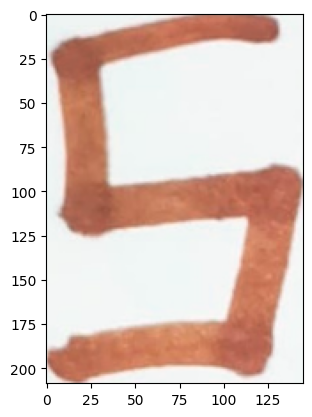

Real classname: 5
Prediction classname: 9 , Score: 0.7566434


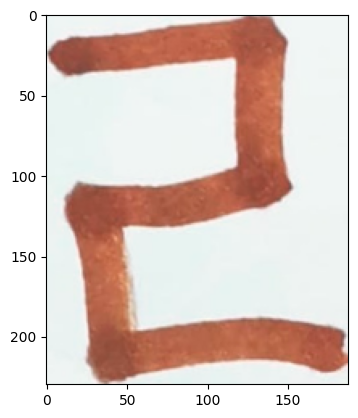

Real classname: 2
Prediction classname: 6 , Score: 0.26241097


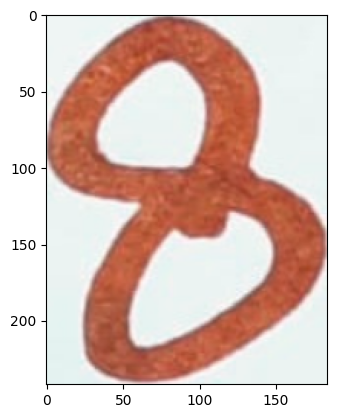

Real classname: 8
Prediction classname: 8 , Score: 0.86623913


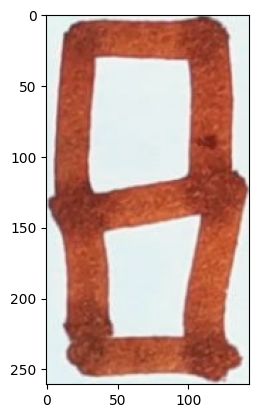

Real classname: 8
Prediction classname: 4 , Score: 0.5247003


In [23]:
import matplotlib.pyplot as plt

# Make prediction
output = model(tf.constant(serialized_examples))

y_true = labels
y_pred = output['output'].numpy()
y_pred_label = output['label'].numpy() 

#print(outputs)
for index, im in enumerate(images[:5]):
    plt.imshow(im)
    plt.show()
    print('Real classname:', y_true[index])
    
    pred_label = y_pred_label[index] #karena pred_label = index argmax
    print('Prediction classname:', pred_label, ', Score:', y_pred[index][pred_label])